<a href="https://colab.research.google.com/github/bggokmou/BigdataHomework/blob/master/13%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
raw_data = pd.read_csv('./survey_results_public.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [10]:
target_data = raw_data[['Age','Country','LanguageHaveWorkedWith', 'LearnCode']]
target_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,18-24 years old,NaN,NaN,NaN
1,25-34 years old,United States of America,HTML/CSS;JavaScript;Python,Books / Physical media;Colleague;Friend or fam...
2,45-54 years old,United States of America,Bash/Shell (all shells);Go,Books / Physical media;Colleague;On the job tr...
3,25-34 years old,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Colleague;Friend or family member;Other online...
4,25-34 years old,Philippines,HTML/CSS;JavaScript;TypeScript,Books / Physical media;Online Courses or Certi...


In [11]:
target_data['Age']
target_data['Age'].drop_duplicates()

0         18-24 years old
1         25-34 years old
2         45-54 years old
5         35-44 years old
18     Under 18 years old
36        55-64 years old
103     65 years or older
245     Prefer not to say
Name: Age, dtype: object

In [12]:
size_by_age = target_data.groupby('Age').size()
size_by_age

Age
18-24 years old       17931
25-34 years old       33247
35-44 years old       20532
45-54 years old        8334
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Under 18 years old     4128
dtype: int64

In [13]:
size_by_country = target_data.groupby('Country').size()
size_by_country

Country
Afghanistan                              64
Albania                                  60
Algeria                                  85
Andorra                                  16
Angola                                   13
                                       ... 
Venezuela, Bolivarian Republic of...    106
Viet Nam                                390
Yemen                                    20
Zambia                                   26
Zimbabwe                                 34
Length: 185, dtype: int64

<Axes: xlabel='Age'>

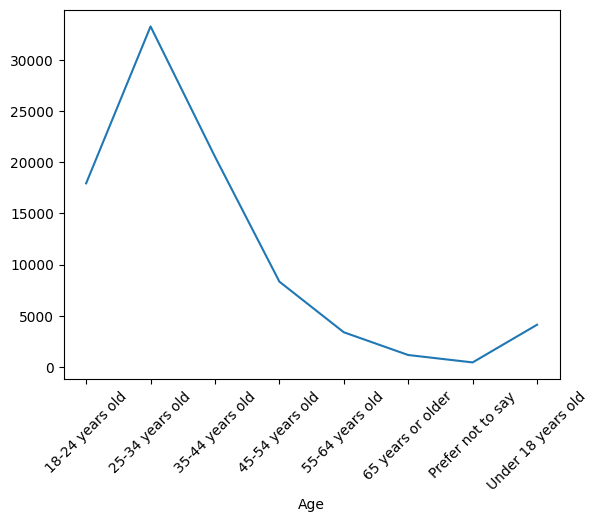

In [14]:
size_by_age.plot.line(rot=45)

<Axes: ylabel='Age'>

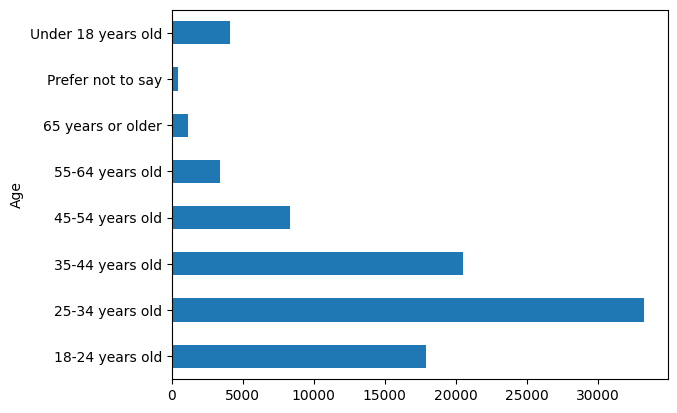

In [15]:
size_by_age.plot.barh()

In [16]:
size_by_age.index

Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')

In [18]:
target_size_by_age = size_by_age.reindex(index=[
     'Prefer not to say',
     '65 years or older',
     '55-64 years old',
     '45-54 years old',
     '35-44 years old',
     '25-34 years old',
     '18-24 years old',
     'Under 18 years old'])
target_size_by_age

Age
Prefer not to say       449
65 years or older      1171
55-64 years old        3392
45-54 years old        8334
35-44 years old       20532
25-34 years old       33247
18-24 years old       17931
Under 18 years old     4128
dtype: int64

<Axes: ylabel='Age'>

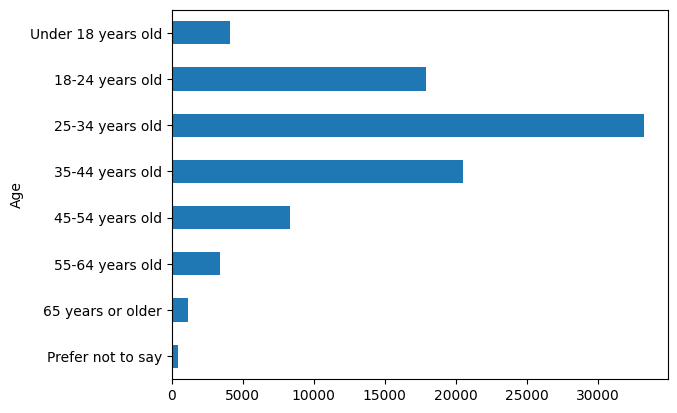

In [19]:
target_size_by_age.plot.barh()

<Axes: >

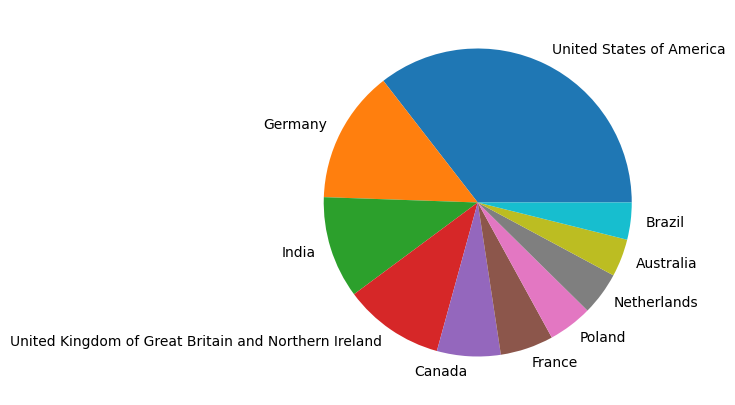

In [20]:
size_by_country.nlargest(10).plot.pie(figsize=(5,5))

In [21]:
languages = target_data['LanguageHaveWorkedWith']
languages.head()

0                                                  NaN
1                           HTML/CSS;JavaScript;Python
2                           Bash/Shell (all shells);Go
3    Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4                       HTML/CSS;JavaScript;TypeScript
Name: LanguageHaveWorkedWith, dtype: object

In [22]:
languages = languages.str.split(';')
languages

0                                                      NaN
1                           [HTML/CSS, JavaScript, Python]
2                            [Bash/Shell (all shells), Go]
3        [Bash/Shell (all shells), HTML/CSS, JavaScript...
4                       [HTML/CSS, JavaScript, TypeScript]
                               ...                        
89179        [HTML/CSS, Java, JavaScript, SQL, TypeScript]
89180                            [Dart, Java, Python, SQL]
89181    [Assembly, Bash/Shell (all shells), C, C#, Pyt...
89182    [Bash/Shell (all shells), C#, HTML/CSS, Java, ...
89183                [C#, Go, JavaScript, SQL, TypeScript]
Name: LanguageHaveWorkedWith, Length: 89184, dtype: object

In [23]:
exploded_languages = languages.explode()
exploded_languages

0                            NaN
1                       HTML/CSS
1                     JavaScript
1                         Python
2        Bash/Shell (all shells)
                  ...           
89183                         C#
89183                         Go
89183                 JavaScript
89183                        SQL
89183                 TypeScript
Name: LanguageHaveWorkedWith, Length: 468201, dtype: object

In [24]:
size_by_languages = exploded_languages.groupby(exploded_languages).size()
size_by_languages

LanguageHaveWorkedWith
APL                          225
Ada                          677
Apex                         579
Assembly                    4753
Bash/Shell (all shells)    28351
C                          16940
C#                         24193
C++                        19634
Clojure                     1105
Cobol                        576
Crystal                      389
Dart                        5273
Delphi                      2831
Elixir                      2028
Erlang                       868
F#                           849
Flow                         214
Fortran                      833
GDScript                    1495
Go                         11592
Groovy                      2976
HTML/CSS                   46396
Haskell                     1829
Java                       26757
JavaScript                 55711
Julia                       1010
Kotlin                      7935
Lisp                        1342
Lua                         5336
MATLAB              

<Axes: ylabel='LanguageHaveWorkedWith'>

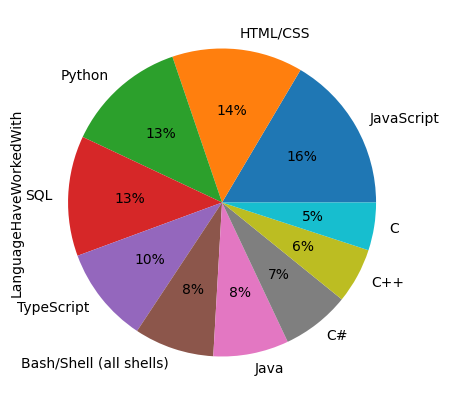

In [25]:
size_by_languages.nlargest(10).plot.pie(figsize=(5,5), autopct='%1.0f%%')

In [28]:
languages_25_34 = target_data[target_data['Age'] == '25-34 years old']['LanguageHaveWorkedWith'].str.split(';').explode()
languages_25_34

1                       HTML/CSS
1                     JavaScript
1                         Python
3        Bash/Shell (all shells)
3                       HTML/CSS
                  ...           
89179                   HTML/CSS
89179                       Java
89179                 JavaScript
89179                        SQL
89179                 TypeScript
Name: LanguageHaveWorkedWith, Length: 167858, dtype: object

<Axes: ylabel='LanguageHaveWorkedWith'>

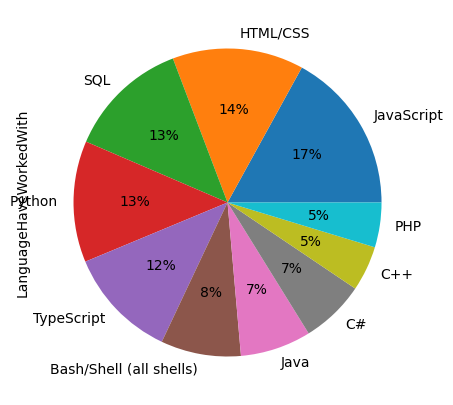

In [29]:
languages_25_34.groupby(languages_25_34).size().nlargest(10).plot.pie(figsize=(5,5), autopct='%1.0f%%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

<Axes: ylabel='LearnCode'>

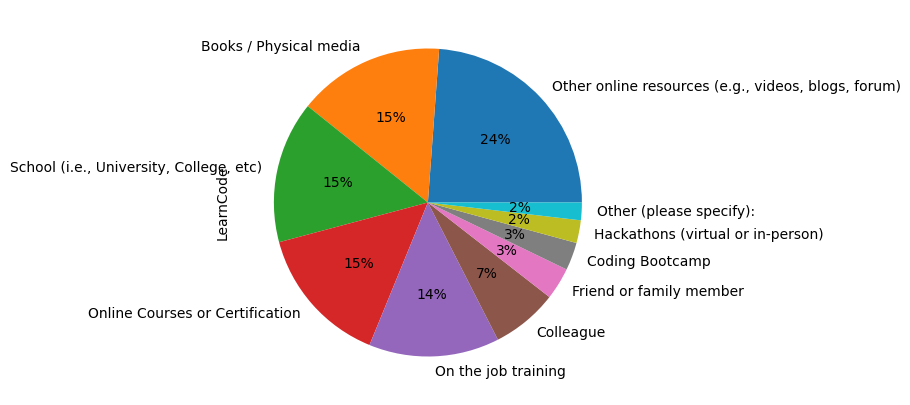

In [30]:
import pandas as pd
raw_data = pd.read_csv('./survey_results_public.csv')
raw_data.info()
target_data = raw_data[['Age', 'Country', 'LanguageHaveWorkedWith', 'LearnCode']]
target_data.head()
size_by_LearnCode = target_data.groupby('LearnCode').size()
size_by_LearnCode
methods = target_data['LearnCode']
methods
methods = methods.str.split(';')
methods
exploded_methods = methods.explode()
exploded_methods
size_by_methods = exploded_methods.groupby(exploded_methods).size()
size_by_methods
size_by_methods.nlargest(10).plot.pie(figsize=(5,5), autopct='%1.0f%%')